In [1]:
# 📦 Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn: Modelos Dummy
from sklearn.dummy import DummyClassifier, DummyRegressor

# Scikit-Learn: Modelos reales para comparación
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Scikit-Learn: Utilidades
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, ConfusionMatrixDisplay,
                             mean_squared_error, mean_absolute_error, r2_score)
from sklearn.datasets import make_classification, make_regression, load_iris

# Configuración
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
RANDOM_STATE = 42

print("✅ Librerías cargadas correctamente")

✅ Librerías cargadas correctamente


---

## 2. DummyClassifier: Clasificación sin Inteligencia

El `DummyClassifier` hace predicciones **ignorando completamente las features**. Solo usa información del target.

### 📋 Estrategias Disponibles

| Estrategia | Descripción | Cuándo usarla |
|------------|-------------|---------------|
| `most_frequent` | Siempre predice la clase más común | Datasets desbalanceados |
| `stratified` | Predice respetando la proporción de clases | Caso general |
| `uniform` | Predice cada clase con igual probabilidad | Referencia aleatoria |
| `constant` | Siempre predice una clase específica | Testing específico |

In [2]:
# Crear dataset de ejemplo: DESBALANCEADO (90% clase 0, 10% clase 1)
np.random.seed(RANDOM_STATE)
n_samples = 1000

X, y = make_classification(
    n_samples=n_samples,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    weights=[0.9, 0.1],  # 90% clase 0, 10% clase 1
    random_state=RANDOM_STATE
)

# Ver distribución de clases
unique, counts = np.unique(y, return_counts=True)
print("📊 Distribución de clases:")
for clase, count in zip(unique, counts):
    print(f"   Clase {clase}: {count} ({count/len(y)*100:.1f}%)")

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y
)

📊 Distribución de clases:
   Clase 0: 896 (89.6%)
   Clase 1: 104 (10.4%)


In [3]:
# =============================================
# 🎯 EJEMPLO 1: DummyClassifier con "most_frequent"
# =============================================

# Crear y entrenar el modelo dummy
dummy_mf = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)
dummy_mf.fit(X_train, y_train)

# Predecir
y_pred_dummy = dummy_mf.predict(X_test)

# Ver qué predice
print("🤖 DummyClassifier (most_frequent):")
print(f"   Siempre predice: {dummy_mf.class_prior_}")
print(f"   Predicciones únicas: {np.unique(y_pred_dummy)}")
print(f"   Accuracy: {accuracy_score(y_test, y_pred_dummy):.2%}")

print("\n⚠️ ¡Tiene ~90% de accuracy sin aprender nada!")

🤖 DummyClassifier (most_frequent):
   Siempre predice: [0.89571429 0.10428571]
   Predicciones únicas: [0]
   Accuracy: 89.67%

⚠️ ¡Tiene ~90% de accuracy sin aprender nada!


In [4]:
# =============================================
# 🎯 EJEMPLO 2: Comparar TODAS las estrategias
# =============================================

estrategias = ['most_frequent', 'stratified', 'uniform']
resultados = []

for estrategia in estrategias:
    dummy = DummyClassifier(strategy=estrategia, random_state=RANDOM_STATE)
    dummy.fit(X_train, y_train)
    y_pred = dummy.predict(X_test)
    
    resultados.append({
        'Estrategia': estrategia,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Predicción más común': np.bincount(y_pred).argmax()
    })

df_dummy = pd.DataFrame(resultados)
print("📊 Comparación de estrategias DummyClassifier:\n")
print(df_dummy.to_string(index=False))

📊 Comparación de estrategias DummyClassifier:

   Estrategia  Accuracy  Predicción más común
most_frequent  0.896667                     0
   stratified  0.800000                     0
      uniform  0.513333                     0


In [5]:
# =============================================
# 🎯 EJEMPLO 3: Dummy vs Modelo Real
# =============================================

# Modelos a comparar
modelos = {
    'Dummy (most_frequent)': DummyClassifier(strategy='most_frequent'),
    'Dummy (stratified)': DummyClassifier(strategy='stratified'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(max_depth=5)
}

resultados_comparacion = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    resultados_comparacion.append({
        'Modelo': nombre,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Es Baseline': 'Dummy' in nombre
    })

df_comp = pd.DataFrame(resultados_comparacion)
print("📊 COMPARACIÓN: Dummy vs Modelos Reales\n")
print(df_comp.to_string(index=False))

print("\n💡 Si tu modelo no supera al Dummy, ¡no está aprendiendo!")

📊 COMPARACIÓN: Dummy vs Modelos Reales

               Modelo  Accuracy  Es Baseline
Dummy (most_frequent)  0.896667         True
   Dummy (stratified)  0.800000         True
  Logistic Regression  0.906667        False
        Decision Tree  0.956667        False

💡 Si tu modelo no supera al Dummy, ¡no está aprendiendo!


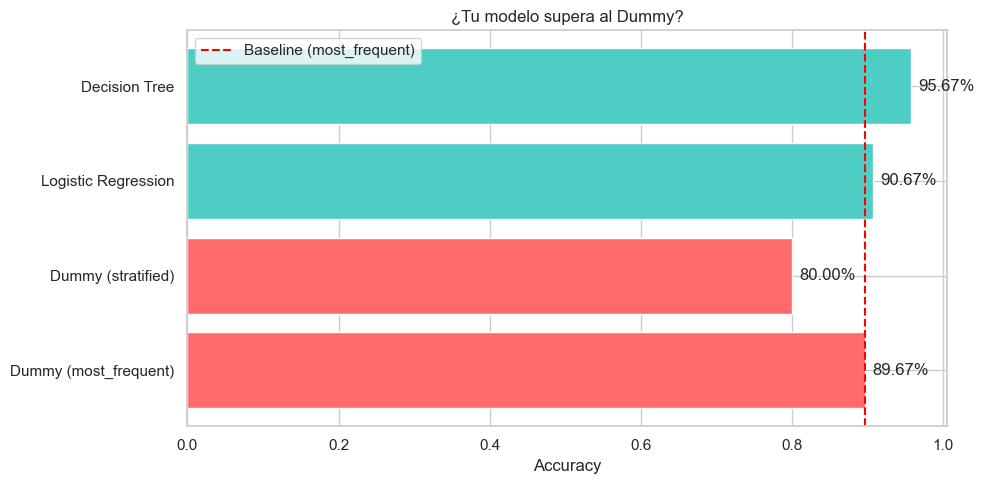

In [6]:
# Visualización de la comparación
fig, ax = plt.subplots(figsize=(10, 5))

colores = ['#ff6b6b' if es_baseline else '#4ecdc4' 
           for es_baseline in df_comp['Es Baseline']]

bars = ax.barh(df_comp['Modelo'], df_comp['Accuracy'], color=colores)
ax.axvline(x=df_comp[df_comp['Modelo']=='Dummy (most_frequent)']['Accuracy'].values[0], 
           color='red', linestyle='--', label='Baseline (most_frequent)')

ax.set_xlabel('Accuracy')
ax.set_title('¿Tu modelo supera al Dummy?')
ax.legend()

# Añadir valores en las barras
for bar, acc in zip(bars, df_comp['Accuracy']):
    ax.text(acc + 0.01, bar.get_y() + bar.get_height()/2, 
            f'{acc:.2%}', va='center')

plt.tight_layout()
plt.show()

---

## 3. DummyRegressor: Regresión sin Inteligencia

El `DummyRegressor` predice valores **sin usar las features**, solo estadísticas del target.

### 📋 Estrategias Disponibles

| Estrategia | Descripción | Fórmula |
|------------|-------------|----------|
| `mean` | Predice el promedio del target | $\hat{y} = \bar{y}_{train}$ |
| `median` | Predice la mediana del target | $\hat{y} = \text{median}(y_{train})$ |
| `constant` | Predice un valor fijo | $\hat{y} = c$ |

In [7]:
# Crear dataset de regresión
X_reg, y_reg = make_regression(
    n_samples=500,
    n_features=5,
    n_informative=3,
    noise=20,
    random_state=RANDOM_STATE
)

# Split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=RANDOM_STATE
)

print(f"📊 Target (y):")
print(f"   Media: {yr_train.mean():.2f}")
print(f"   Mediana: {np.median(yr_train):.2f}")
print(f"   Std: {yr_train.std():.2f}")

📊 Target (y):
   Media: -0.68
   Mediana: 0.43
   Std: 107.77


In [9]:
# =============================================
# 🎯 EJEMPLO: DummyRegressor con "mean"
# =============================================

dummy_reg = DummyRegressor(strategy='mean')
dummy_reg.fit(Xr_train, yr_train)

# Ver qué predice
yr_pred_dummy = dummy_reg.predict(Xr_test)

print("🤖 DummyRegressor (mean):")
print(f"   Siempre predice: {dummy_reg.constant_}")
print(f"   Primeras 5 predicciones: {yr_pred_dummy[:5]}")
print(f"   MSE: {mean_squared_error(yr_test, yr_pred_dummy):.2f}")
print(f"   R²: {r2_score(yr_test, yr_pred_dummy):.4f}")

print("\n💡 El R² del DummyRegressor(mean) es SIEMPRE ≈ 0")

🤖 DummyRegressor (mean):
   Siempre predice: [[-0.67513984]]
   Primeras 5 predicciones: [-0.67513984 -0.67513984 -0.67513984 -0.67513984 -0.67513984]
   MSE: 12949.14
   R²: -0.0151

💡 El R² del DummyRegressor(mean) es SIEMPRE ≈ 0


In [10]:
# =============================================
# 🎯 COMPARACIÓN: Dummy vs Modelos Reales (Regresión)
# =============================================

modelos_reg = {
    'Dummy (mean)': DummyRegressor(strategy='mean'),
    'Dummy (median)': DummyRegressor(strategy='median'),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=5)
}

resultados_reg = []

for nombre, modelo in modelos_reg.items():
    modelo.fit(Xr_train, yr_train)
    yr_pred = modelo.predict(Xr_test)
    
    resultados_reg.append({
        'Modelo': nombre,
        'MSE': mean_squared_error(yr_test, yr_pred),
        'MAE': mean_absolute_error(yr_test, yr_pred),
        'R²': r2_score(yr_test, yr_pred),
        'Es Baseline': 'Dummy' in nombre
    })

df_reg = pd.DataFrame(resultados_reg)
print("📊 COMPARACIÓN: Dummy vs Modelos Reales (Regresión)\n")
print(df_reg.to_string(index=False))

📊 COMPARACIÓN: Dummy vs Modelos Reales (Regresión)

           Modelo          MSE       MAE        R²  Es Baseline
     Dummy (mean) 12949.139502 91.574264 -0.015122         True
   Dummy (median) 12919.631408 91.419720 -0.012809         True
Linear Regression   399.400436 16.251568  0.968690        False
    Decision Tree  1470.106601 29.536610  0.884754        False


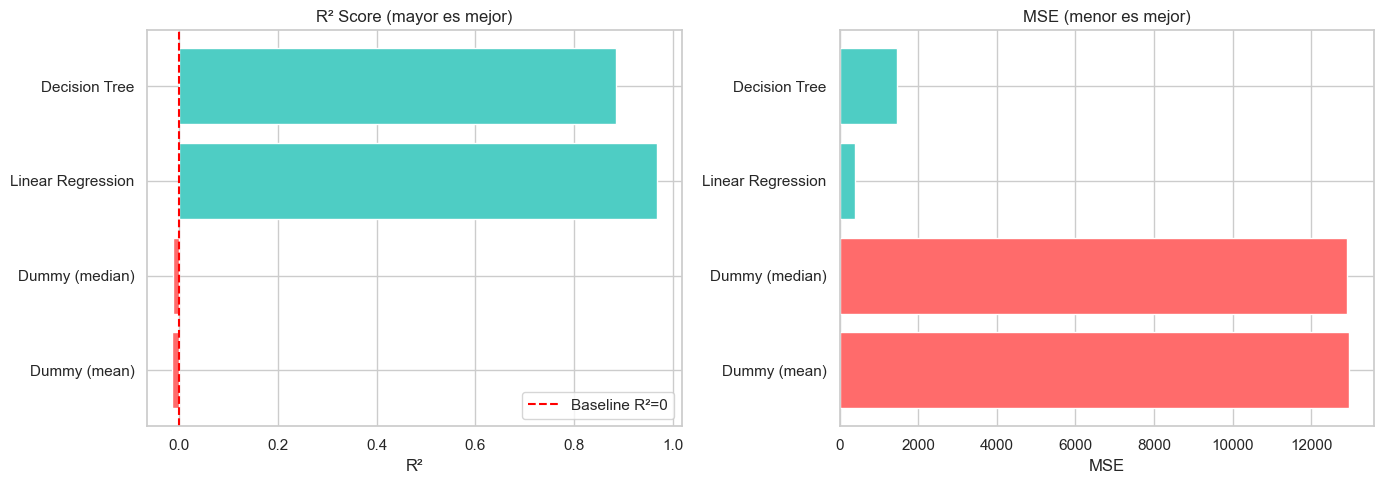

💡 Un buen modelo debe tener R² > 0 y MSE < Dummy


In [11]:
# Visualización para Regresión
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico R²
colores = ['#ff6b6b' if es_baseline else '#4ecdc4' 
           for es_baseline in df_reg['Es Baseline']]

axes[0].barh(df_reg['Modelo'], df_reg['R²'], color=colores)
axes[0].axvline(x=0, color='red', linestyle='--', label='Baseline R²=0')
axes[0].set_xlabel('R²')
axes[0].set_title('R² Score (mayor es mejor)')
axes[0].legend()

# Gráfico MSE
axes[1].barh(df_reg['Modelo'], df_reg['MSE'], color=colores)
axes[1].set_xlabel('MSE')
axes[1].set_title('MSE (menor es mejor)')

plt.tight_layout()
plt.show()

print("💡 Un buen modelo debe tener R² > 0 y MSE < Dummy")

---

## 4. Caso Práctico: ¿Mi modelo es mejor que adivinar?

Usaremos el dataset **Iris** para un ejemplo completo de clasificación.

In [12]:
# Cargar Iris (dataset balanceado)
from sklearn.datasets import load_iris

iris = load_iris()
X_iris, y_iris = iris.data, iris.target

print(f"📊 Dataset Iris:")
print(f"   Samples: {X_iris.shape[0]}")
print(f"   Features: {X_iris.shape[1]}")
print(f"   Clases: {iris.target_names}")
print(f"   Distribución: {np.bincount(y_iris)}")

📊 Dataset Iris:
   Samples: 150
   Features: 4
   Clases: ['setosa' 'versicolor' 'virginica']
   Distribución: [50 50 50]


In [13]:
# Pipeline completo con Cross-Validation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Definir modelos (incluyendo Dummy como baseline)
pipelines = {
    '🎲 Dummy (stratified)': Pipeline([
        ('scaler', StandardScaler()),
        ('model', DummyClassifier(strategy='stratified', random_state=RANDOM_STATE))
    ]),
    '📈 Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))
    ]),
    '🌳 Decision Tree': Pipeline([
        ('scaler', StandardScaler()),
        ('model', DecisionTreeClassifier(max_depth=3, random_state=RANDOM_STATE))
    ])
}

# Cross-Validation
print("📊 EVALUACIÓN CON CROSS-VALIDATION (5-Fold)\n")
print(f"{'Modelo':<30} {'Mean CV Score':>15} {'Std':>10}")
print("="*55)

for nombre, pipe in pipelines.items():
    scores = cross_val_score(pipe, X_iris, y_iris, cv=5, scoring='accuracy')
    print(f"{nombre:<30} {scores.mean():>15.2%} {scores.std():>10.2%}")

print("\n✅ Los modelos reales superan claramente al Dummy")

📊 EVALUACIÓN CON CROSS-VALIDATION (5-Fold)

Modelo                           Mean CV Score        Std
🎲 Dummy (stratified)                    33.33%      0.00%
📈 Logistic Regression                   96.00%      3.89%
🌳 Decision Tree                         97.33%      2.49%

✅ Los modelos reales superan claramente al Dummy


---

## 5. Resumen y Buenas Prácticas

### 🏆 Lo que aprendiste

1. **DummyClassifier** predice sin usar features:
   - `most_frequent`: siempre la clase más común
   - `stratified`: respeta proporciones
   - `uniform`: aleatorio uniforme

2. **DummyRegressor** predice sin usar features:
   - `mean`: siempre el promedio
   - `median`: siempre la mediana

3. **¿Por qué usarlos?**
   - Detectar si tu modelo realmente aprende
   - Establecer un mínimo a superar
   - Identificar problemas de datos desbalanceados

### ✅ Checklist para tu proyecto

```python
# 1. Siempre incluye un DummyClassifier/DummyRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor

# 2. Compara tu modelo contra el baseline
baseline = DummyClassifier(strategy='most_frequent')  # o 'mean' para regresión
baseline.fit(X_train, y_train)
score_baseline = baseline.score(X_test, y_test)

# 3. Tu modelo DEBE superar este score
if mi_modelo.score(X_test, y_test) > score_baseline:
    print("✅ El modelo aprendió algo útil")
else:
    print("❌ El modelo no supera al baseline - revisar")
```

### ⚠️ Red Flags

| Señal de Alerta | Posible Causa |
|-----------------|---------------|
| Modelo ≈ Dummy accuracy | Features no informativas |
| Modelo < Dummy | Bug en código o data leakage inverso |
| Dummy tiene 95%+ accuracy | Dataset muy desbalanceado |

---

### 👉 Siguiente Paso

Ahora que sabes crear baselines, aprende a construir **Pipelines** que encapsulen todo el preprocesamiento + modelo en el notebook `02_Pipelines_y_Baselines.ipynb`.